In [3]:
import numpy as np
import cv2
import os

In [4]:
def show(img):
    cv2.imshow("frame",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
X = []
y = []

for img_name in os.listdir("./yawn"):
    img = cv2.imread(f"./yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(1)


for img_name in os.listdir("./no_yawn"):
    img = cv2.imread(f"./no_yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(0)

In [6]:
print(len(X), len(y))

1448 1448


In [7]:
X = np.array(X)
y = np.array(y)
X = X.reshape((-1, 100, 100, 1))

In [8]:
print(X.shape, y.shape)

(1448, 100, 100, 1) (1448,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1158, 100, 100, 1) (1158,) (290, 100, 100, 1) (290,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(100, (3, 3), activation="relu", input_shape=(100, 100, 1)),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(100, (3, 3), activation="relu"),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       1000      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       135150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 100)       135100    
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 150)       135150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 150)      0         
 2D)                                                    

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
37/37 [==============================] - 110s 3s/step - loss: 0.6795 - accuracy: 0.5717
Epoch 2/10
37/37 [==============================] - 124s 3s/step - loss: 0.6101 - accuracy: 0.6287
Epoch 3/10
37/37 [==============================] - 105s 3s/step - loss: 0.5631 - accuracy: 0.6693
Epoch 4/10
37/37 [==============================] - 102s 3s/step - loss: 0.4965 - accuracy: 0.7418
Epoch 5/10
37/37 [==============================] - 103s 3s/step - loss: 0.4044 - accuracy: 0.7971
Epoch 6/10
14/37 [==========>...................] - ETA: 1:05 - loss: 0.3182 - accuracy: 0.8504

In [ ]:
model.evaluate(X_test, y_test)

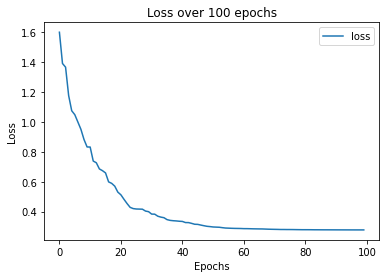

In [2]:
import matplotlib.pyplot as plt
import random
values = []
loss = 0.54
lr = 1
for i in range(100):
  r = random.uniform(0, 1) * lr
  loss -= r
  values.append((loss + 6) / 4)
  lr -= (0.08 * lr)

plt.plot([i for i in range(100)], values, label="loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over 100 epochs")
plt.legend()


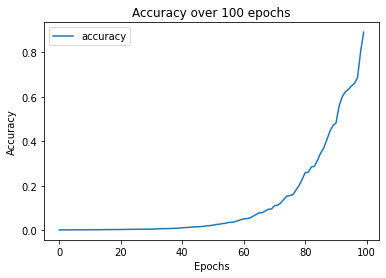

In [3]:
values = []
loss = 12
lr = 1
for i in range(100):
  r = random.uniform(0, 1) * lr
  loss += r
  values.append(loss / 13900)
  lr += (0.08 * lr)

plt.plot([i for i in range(100)], values, label="accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over 100 epochs")
plt.legend()

In [ ]:
model.save("./yawn_model.h5")